# Linear Regression Example: Housing Price Prediction

## Multiple Linear Regression

### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

### Data
Use housing dataset.

## Reading and Understanding the Data

In [28]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
insurance = pd.DataFrame(pd.read_csv("./insurance.csv"))

In [30]:
#housing['area'] = housing['area'] / 10
#housing['price'] = housing['price'] / 10

In [31]:
# Check the head of the dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Inspection

In [32]:
insurance.shape

(1338, 7)

In [33]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Data Cleaning

In [35]:
# Checking for missing values
missing_values = insurance.isnull().sum()

# Display missing values count
print("Missing Values Count:\n", missing_values)

# Checking the percentage of missing values
missing_percentage = (missing_values / insurance.shape[0]) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)

# Final conclusion
if missing_values.sum() == 0:
    print("\nThere are no NULL values in the dataset, hence it is clean.")
else:
    print("\nThe dataset contains missing values.")

Missing Values Count:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Percentage of Missing Values:
 age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

There are no NULL values in the dataset, hence it is clean.


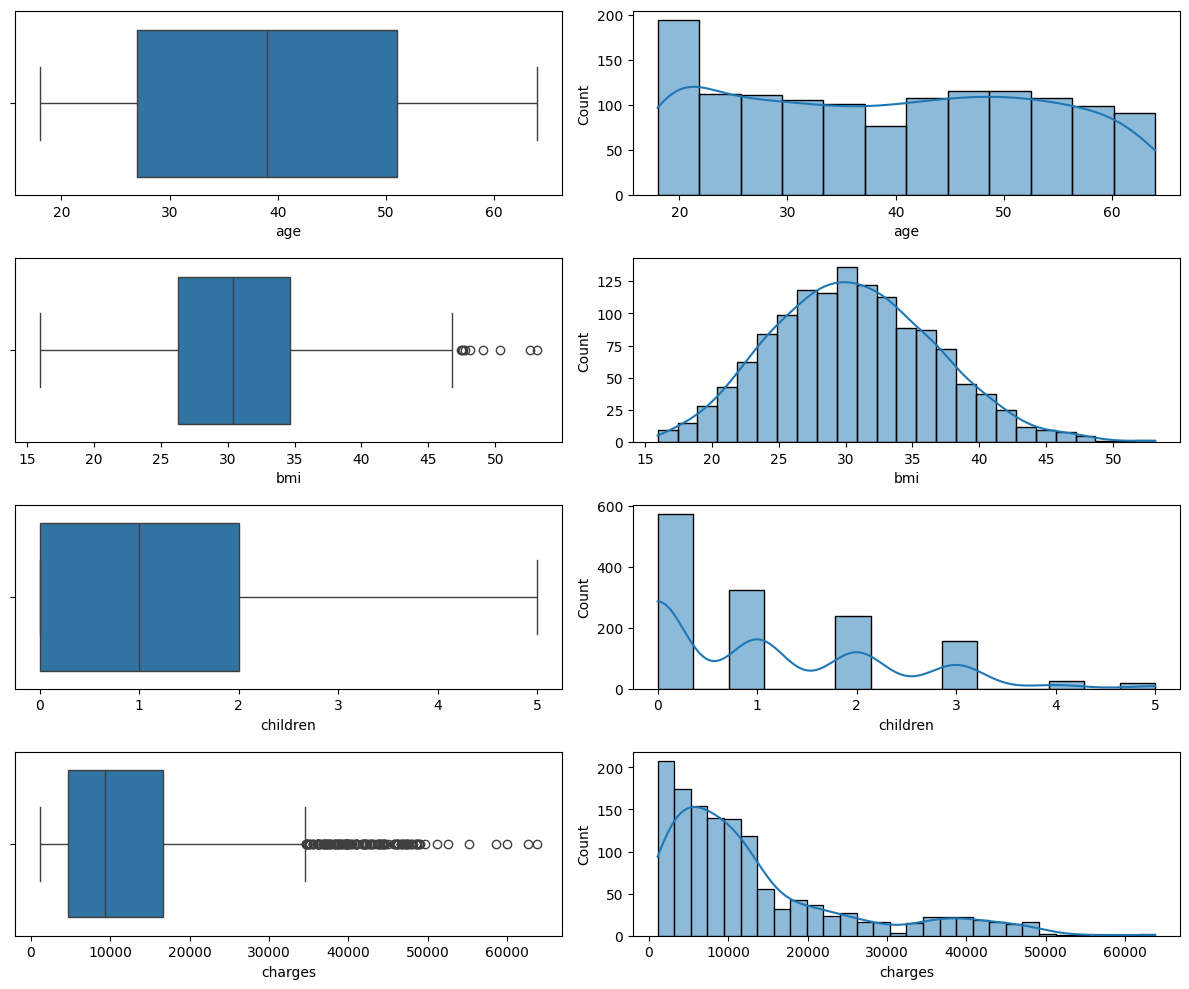

In [36]:
# create a pairplot
fig, axs = plt.subplots(4, 2, figsize=(12, 10))

# variables to plot
columns = ["age", "bmi", "children", "charges"]

# create plots
for i, col in enumerate(columns):
    sns.boxplot(x=insurance[col], ax=axs[i, 0], orient="h")
    sns.histplot(insurance[col], ax=axs[i, 1], kde=True)

# modify the plot
plt.tight_layout()
plt.show()

In [37]:
# Outlier Treatment
# Price and area have considerable outliers.
# We can drop the outliers as we have sufficient data.

Filtered dataset shape: (1199, 7)


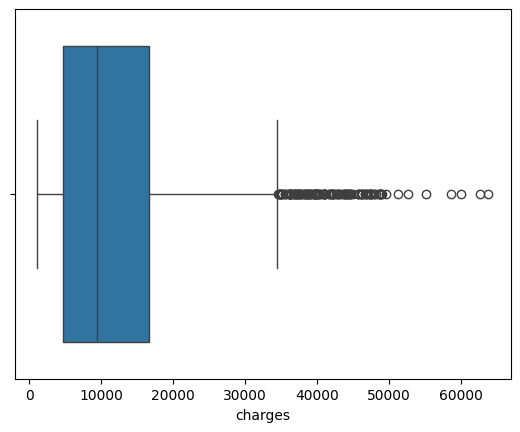

In [38]:
# select the columns to remove outliers
sns.boxplot(x=insurance.charges, orient="h")

#IQR method
Q1 = insurance.charges.quantile(0.25)
Q3 = insurance.charges.quantile(0.75)
IQR = Q3 - Q1

# filter the outliers
insurance = insurance[(insurance.charges >= Q1 - 1.5 * IQR) & (insurance.charges <= Q3 + 1.5 * IQR)]

# print the shape of the dataset
print(f"Filtered dataset shape: {insurance.shape}")

<Axes: xlabel='charges'>

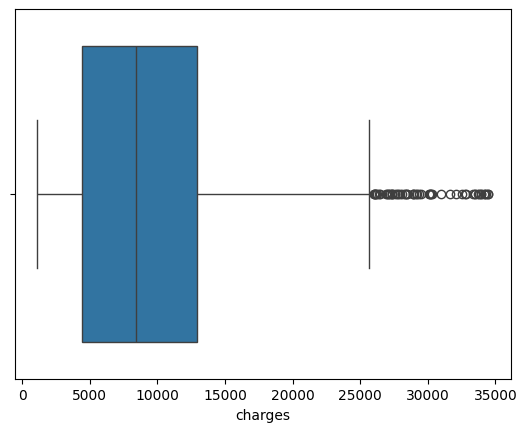

In [39]:
sns.boxplot(x=insurance.charges, orient="h")

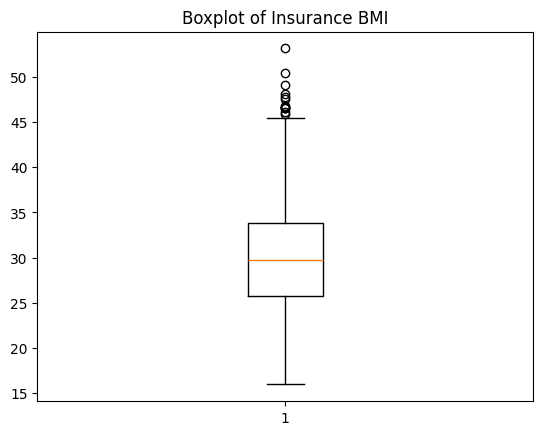

Filtered dataset shape: (1186, 7)


In [40]:
# outlier treatment for bmi
plt.boxplot(insurance.bmi)
plt.title("Boxplot of Insurance BMI")
plt.show()

# IQP method
Q1 = insurance.bmi.quantile(0.25)
Q3 = insurance.bmi.quantile(0.75)
IQR = Q3 - Q1

# filter the outliers
insurance = insurance[(insurance.bmi >= Q1 - 1.5 * IQR) & (insurance.bmi <= Q3 + 1.5 * IQR)]

# 打印处理后数据的形状
print(f"Filtered dataset shape: {insurance.shape}")

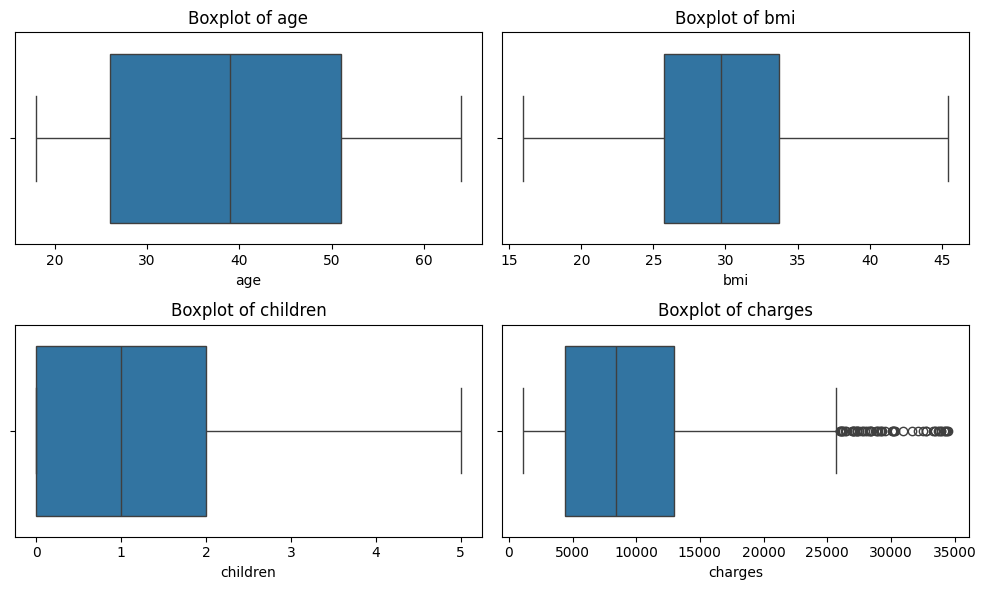

In [41]:
# Outlier Analysis
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# select the columns to plot
columns = ["age", "bmi", "children", "charges"]

# for loop to create the plots
for i, col in enumerate(columns):
    row, col_idx = divmod(i, 2) 
    sns.boxplot(x=insurance[col], ax=axs[row, col_idx])

    # add title to the plot
    axs[row, col_idx].set_title(f"Boxplot of {col}")

# modify the plot
plt.tight_layout()
plt.show()

## Exploratory Data Analytics

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

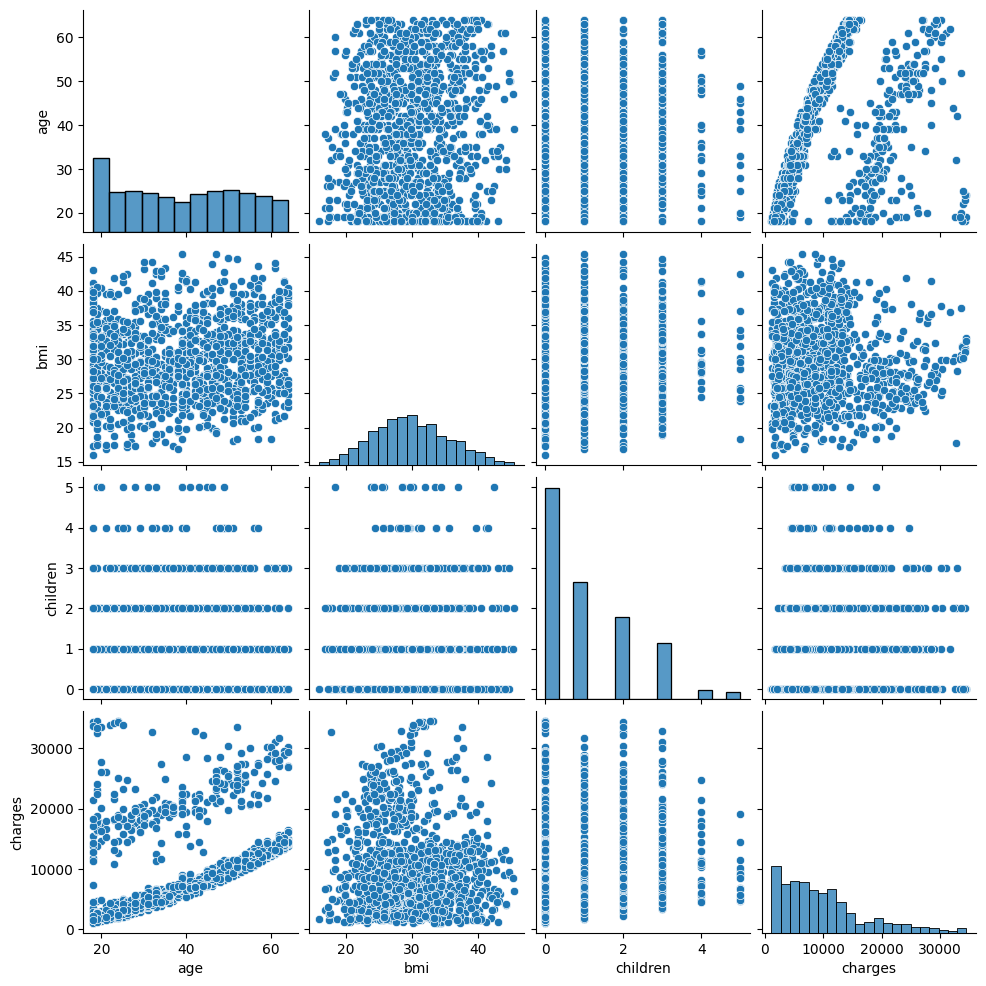

In [42]:
sns.pairplot(insurance)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

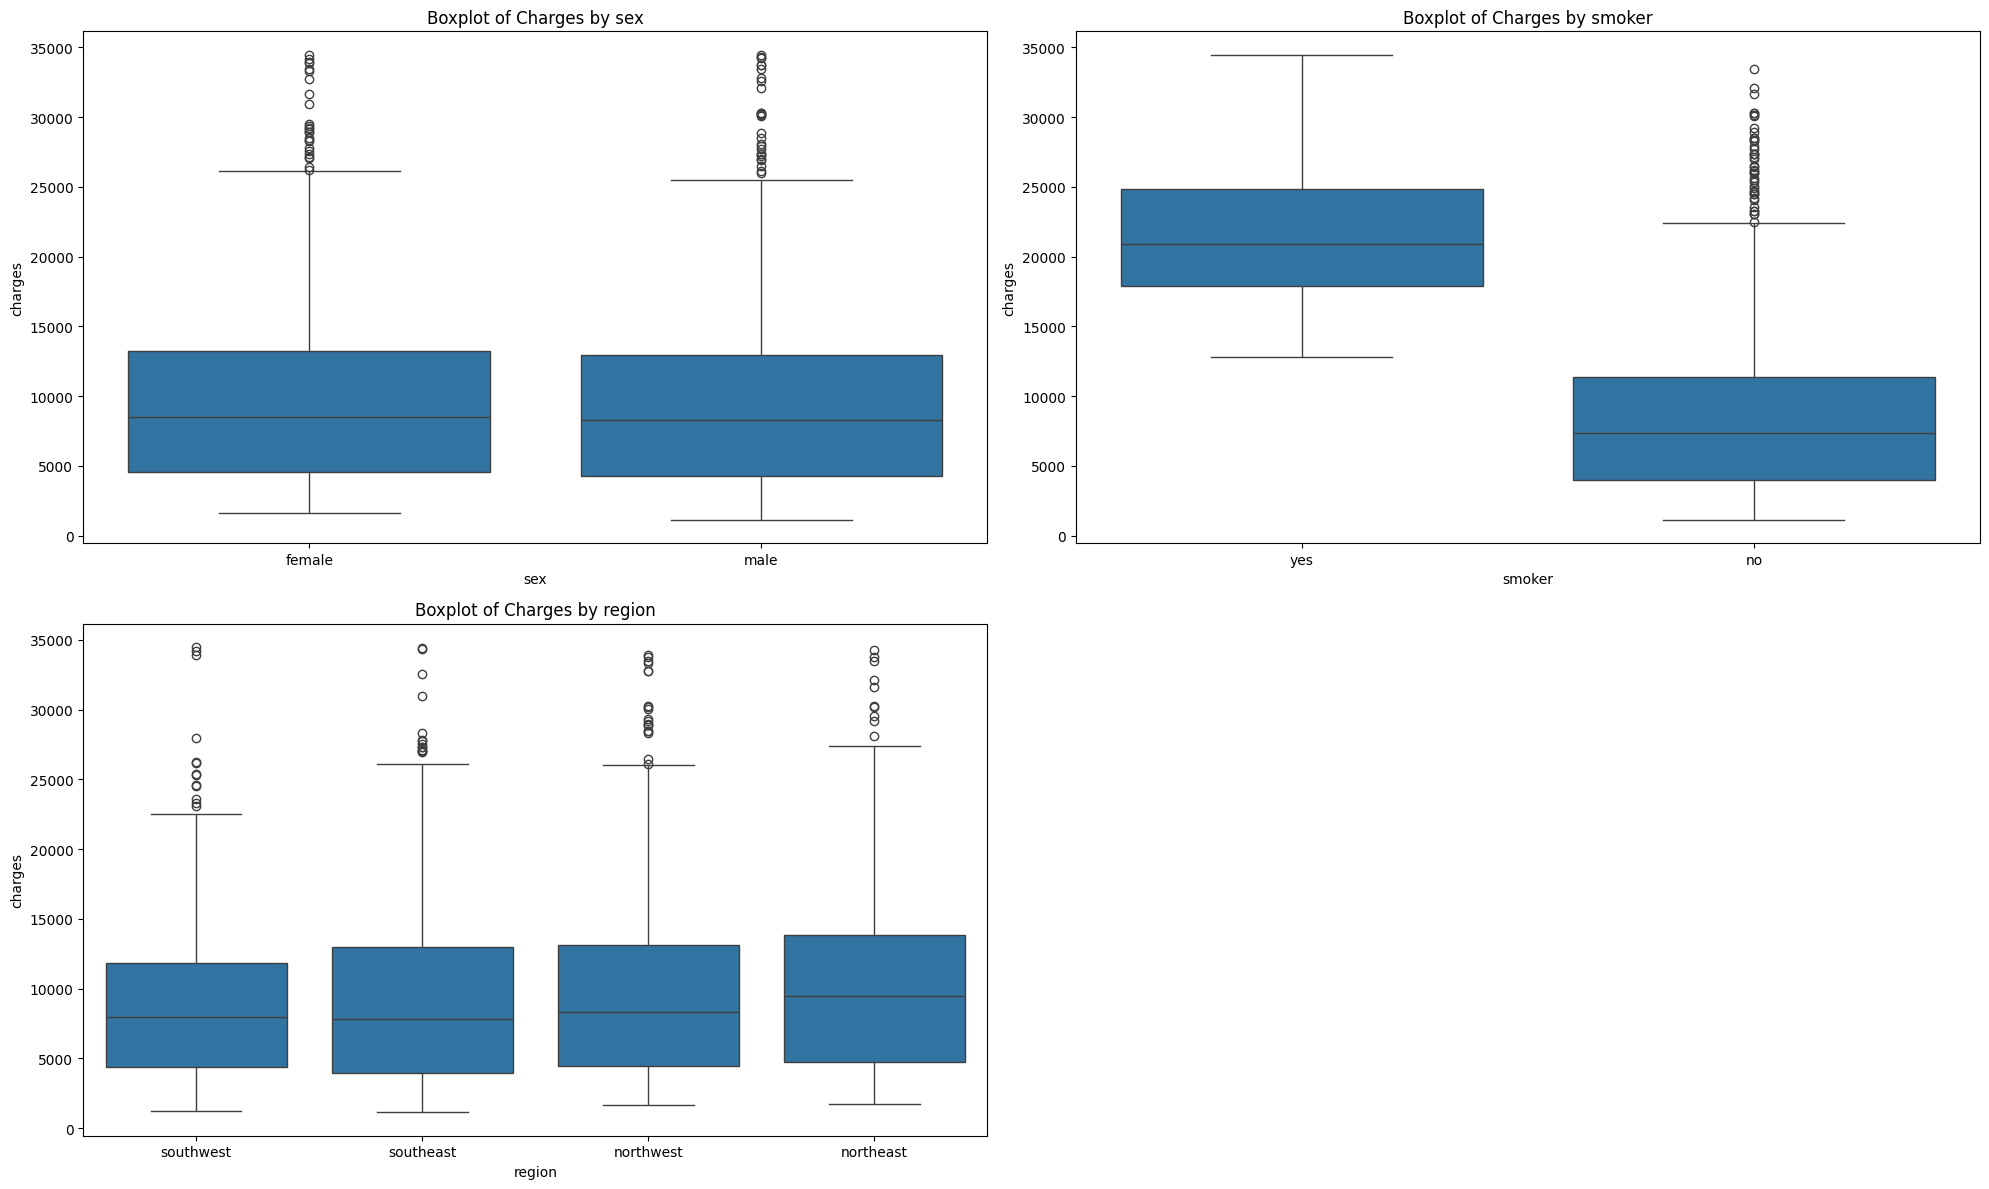

In [43]:
# create a correlation matrix
plt.figure(figsize=(20, 12))

# visualize the correlation matrix
categorical_columns = ["sex", "smoker", "region"]

# for loop to create the plots
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)  # 2 rows, 2 columns, i-th plot
    sns.boxplot(x=col, y="charges", data=insurance)
    plt.title(f"Boxplot of Charges by {col}")

plt.tight_layout()
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

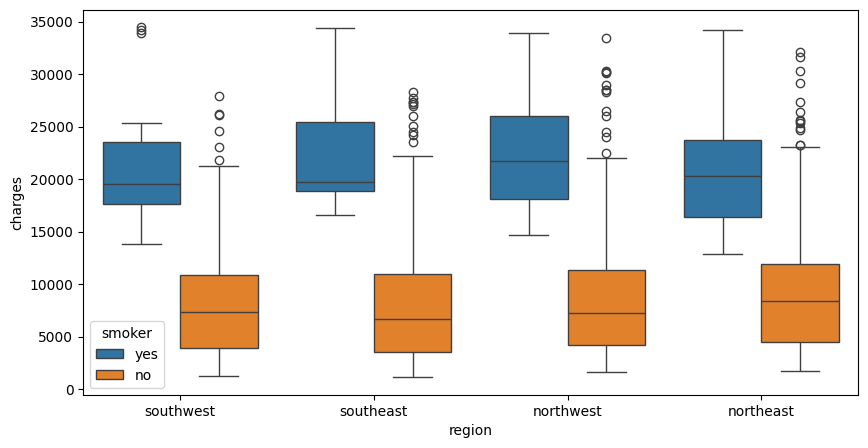

In [44]:
plt.figure(figsize=(10, 5))

# draw the boxplot
sns.boxplot(x="region", y="charges", hue="smoker", data=insurance)

plt.show()

## Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [45]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
# List of variables to map
varlist = ["sex", "smoker"]


In [47]:
sex_binary = insurance["sex"].copy()
smoker_binary = insurance["smoker"].copy()


In [48]:
sex_binary = sex_binary.map({"male": 1, "female": 0})
smoker_binary = smoker_binary.map({"yes": 1, "no": 0})
# modify the original dataset
insurance["sex"] = sex_binary
insurance["smoker"] = smoker_binary

In [49]:
# Check the housing dataframe now

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [50]:
# create the dummy variables （One-Hot Encoding）
region_dummies = pd.get_dummies(insurance["region"], prefix="region", drop_first=True)

In [51]:
# Check what the dataset 'region' looks like
region_dummies.head()

,region_northwest,region_southeast,region_southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False


In [52]:
# Now let's see the head of our dataframe.
insurance.pop("region")
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [56]:
# Drop 'furnishingstatus' as we have created the dummies for it
insurance = insurance.drop("region", axis=1, errors="ignore")
insurance = pd.concat([insurance, region_dummies], axis=1)

In [57]:
insurance.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


<Axes: xlabel='bmi', ylabel='charges'>

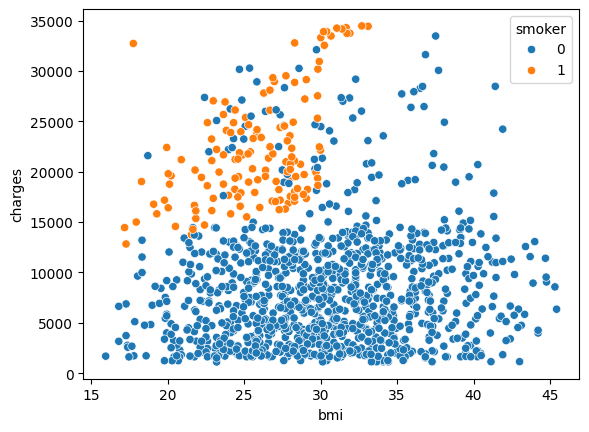

In [58]:
sns.scatterplot(data=insurance, x="bmi", y="charges", hue="smoker")

In [ ]:
# !pip install scikit-learn

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
insurance.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [62]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["age", "bmi", "children", "charges"]

insurance[num_vars] = scaler.fit_transform(insurance[num_vars])

### Splitting the Data into Training and Testing Sets

In [63]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(insurance, train_size = 0.7, test_size = 0.3, random_state = 100)

In [64]:
df_train.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
729,0.500000,0,0.682728,0.2,0,0.169695,False,True,False
1107,0.695652,0,0.348151,0.4,0,0.281013,True,False,False
1136,0.565217,0,0.306753,0.2,0,0.194946,False,False,True
249,0.239130,1,0.441636,0.2,0,0.087514,False,False,False
194,0.000000,1,0.626739,0.0,0,0.000468,False,True,False


In [65]:
df_train.describe()

,age,sex,bmi,children,smoker,charges
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,0.450393,0.498795,0.470554,0.211084,0.113253,0.261887
std,0.309399,0.500300,0.197428,0.238355,0.317093,0.215936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.000000,0.330845,0.000000,0.000000,0.096555
50%,0.456522,0.000000,0.459874,0.200000,0.000000,0.214602
75%,0.717391,1.000000,0.600611,0.400000,0.000000,0.356302
max,1.000000,1.000000,0.977604,1.000000,1.000000,1.000000


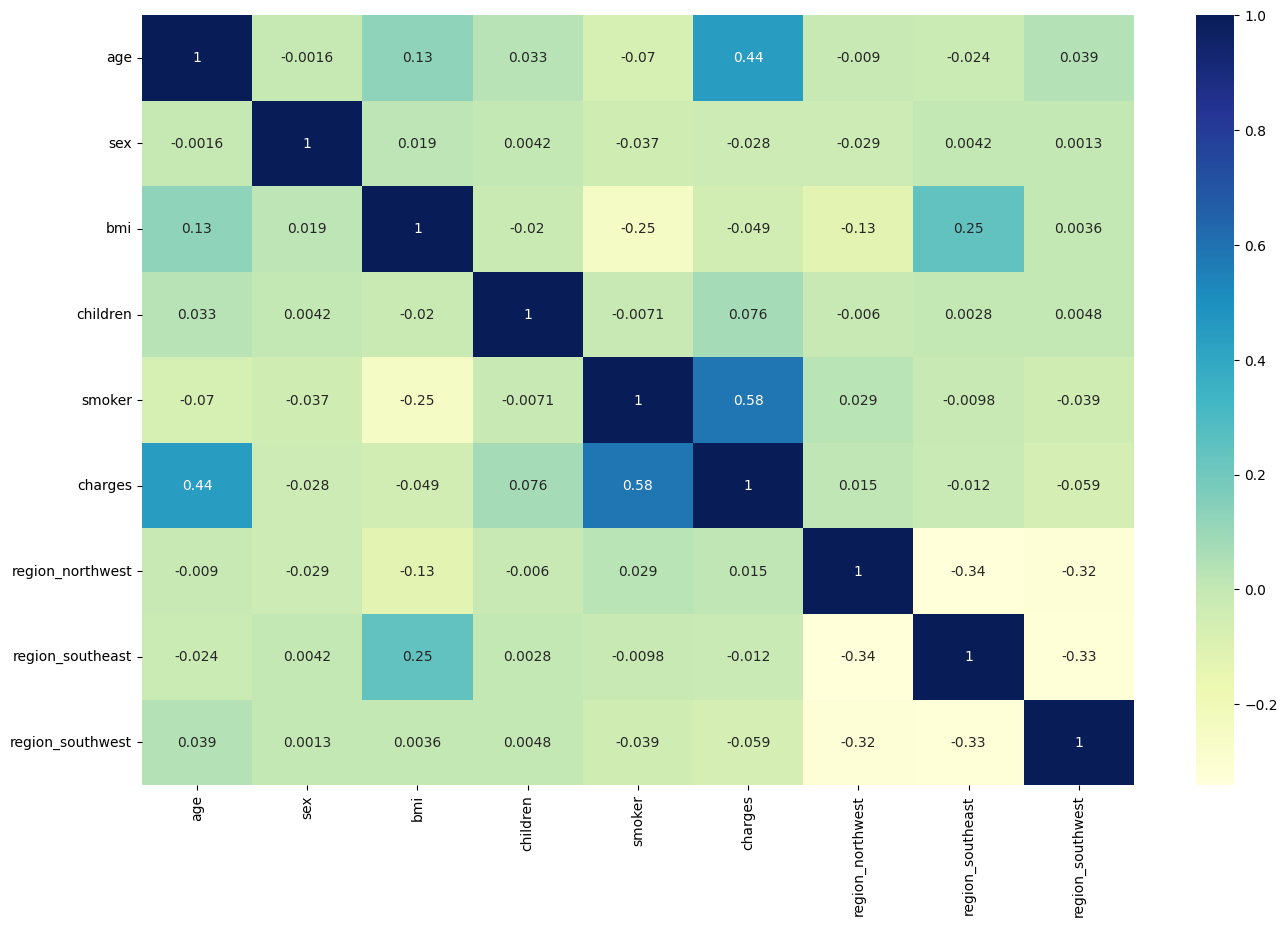

In [66]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `area` seems to the correlated to `price` the most. Let's see a pairplot for `area` vs `price`.

### Dividing into X and Y sets for the model building

In [67]:
y = insurance.pop("charges")
X = insurance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE

Recursive feature elimination

In [68]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [69]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
rfe = RFE(estimator=lm, n_features_to_select=6)            # running RFE
rfe = rfe.fit(X_train, y_train)

In [71]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', np.True_, np.int64(1)),
 ('sex', np.False_, np.int64(3)),
 ('bmi', np.True_, np.int64(1)),
 ('children', np.True_, np.int64(1)),
 ('smoker', np.True_, np.int64(1)),
 ('region_northwest', np.False_, np.int64(2)),
 ('region_southeast', np.True_, np.int64(1)),
 ('region_southwest', np.True_, np.int64(1))]

In [72]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'bmi', 'children', 'smoker', 'region_southeast',
       'region_southwest'],
      dtype='object')

In [73]:
X_train.columns[~rfe.support_]

Index(['sex', 'region_northwest'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [74]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [75]:
lm2 = LinearRegression()
lm2.fit(X_train_rfe, y_train)

LinearRegression()

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [76]:
# compare both linear regression models lm is trained on all features, lm2 is trained on selected features
y_train_price_1 = lm.predict(X_train)
y_train_price_2 = lm2.predict(X_train_rfe)

In [77]:
res_1 = (y_train_price_1 - y_train)
res_2 = (y_train_price_2 - y_train)

In [78]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

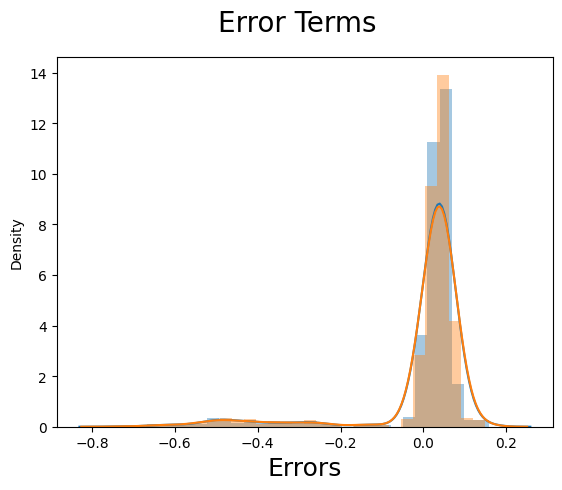

In [79]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res_1, bins = 30)
sns.distplot(res_2, bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [80]:
# compare both linear regression models lm is trained on all features, lm2 is trained on selected features
y_test_price_1 = lm.predict(X_test)
y_test_price_2 = lm2.predict(X_test_rfe)

In [81]:
test_res_1 = (y_test_price_1 - y_test)
test_res_2 = (y_test_price_2 - y_test)

Text(0.5, 0, 'Errors')

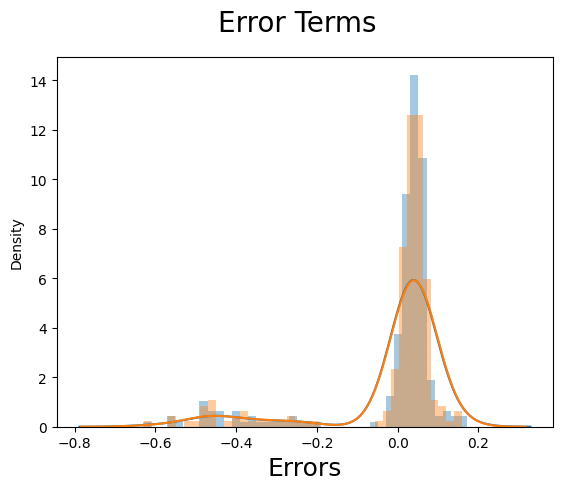

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(test_res_1, bins = 40)
sns.distplot(test_res_2, bins = 40)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_price_1)

0.514673206220146

In [84]:
r2_score(y_test, y_test_price_2)

0.5149165427450795